In [66]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score, accuracy_score
from sklearn.utils import shuffle


In [48]:
# Define the mean vectors and covariance matrix
mean_1 = np.array([0, 2])
cov_1 = 0.5 * np.eye(2)

mean_2 = np.array([0, -2])
cov_2 = 0.5 * np.eye(2)

means = [mean_1, mean_2]
covs = [cov_1, cov_2]
probabilites = [0.5, 0.5]
num_clusters = len(means)

# Initialize an empty list to store the samples
data = []
clusters = []

num_samples = 1000
for _ in range(num_samples):
    cluster = np.random.choice(range(num_clusters), p=probabilites)
    sample = np.random.multivariate_normal(means[cluster], covs[cluster])
    
    data.append(sample)
    clusters.append(cluster)

# Convert the list to a NumPy array for easier handling
data = np.array(data)

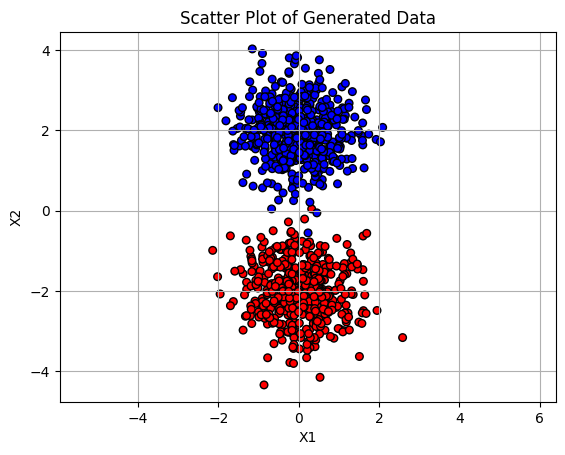

In [49]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='bwr', s=30, edgecolors='k')
plt.title('Scatter Plot of Generated Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.axis('equal')
plt.show()

In [50]:
# Assuming X contains your features and y contains the reference clustering
# X: feature matrix, y: true cluster labels (ground truth)

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, clusters, test_size=0.2, random_state=42)

In [55]:
# Step 2: Use k-means to cluster the data on the training set
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train)

# Assign clusters to the training set
train_clusters = kmeans.labels_

# Step 3: One-hot encode the cluster assignments
encoder = OneHotEncoder(sparse=False)
train_clusters_encoded = encoder.fit_transform(train_clusters.reshape(-1, 1))

In [57]:
# Step 4: Train a Random Forest model using the features and the cluster assignments as targets
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, train_clusters_encoded)

RandomForestClassifier(random_state=42)

In [74]:
# Step 5: Predict cluster assignments for the training set using the trained Random Forest model
train_cluster_proba = rf_model.predict_proba(X_train)

# Convert probabilities back to cluster labels by taking the argmax
train_predicted_clusters = np.argmax(np.hstack(train_cluster_proba), axis=1)

# Compare to the true clustering
train_ari = adjusted_rand_score(y_train, train_predicted_clusters)
train_acc = accuracy_score(y_train, train_predicted_clusters)
print(f"Adjusted Rand Index on training set (no permutation): {train_ari}")
print(f"Accuracy on training set (no permutation): {train_acc}")
print(y_train)
print(train_predicted_clusters)

Adjusted Rand Index on training set (no permutation): 0.9950000000195802
Accuracy on training set (no permutation): 0.00125
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [51]:
# Step 4: Train a Random Forest model using the features and the cluster assignments as targets
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, train_clusters_encoded)

# Step 5: Predict cluster assignments for the test set using the trained Random Forest model
test_cluster_proba = rf_model.predict_proba(X_test)

# Convert probabilities back to cluster labels by taking the argmax
predicted_clusters = np.argmax(np.hstack(test_cluster_proba), axis=1)

# Step 6: Compare the predicted clusters to the reference clusters using the adjusted Rand index
ari = adjusted_rand_score(y_test, predicted_clusters)
print(f"Adjusted Rand Index (no permutation): {ari:.4f}")

# Now we will permute each feature one at a time, for both the training and testing sets
n_features = X_train.shape[1]
train_ari_list = []
test_ari_list = []

for i in range(n_features):
    # Permute the i-th feature in the training data
    X_train_permuted = X_train.copy()
    X_train_permuted[:, i] = shuffle(X_train_permuted[:, i], random_state=42)
    
    # Permute the i-th feature in the testing data
    X_test_permuted = X_test.copy()
    X_test_permuted[:, i] = shuffle(X_test_permuted[:, i], random_state=42)

    # Predict cluster assignments on permuted training set
    train_cluster_proba_permuted = rf_model.predict_proba(X_train_permuted)
    train_pred_clusters_permuted = np.argmax(np.hstack(train_cluster_proba_permuted), axis=1)
    train_ari = adjusted_rand_score(train_clusters, train_pred_clusters_permuted)
    train_ari_list.append(train_ari)

    # Predict cluster assignments on permuted testing set
    test_cluster_proba_permuted = rf_model.predict_proba(X_test_permuted)
    test_pred_clusters_permuted = np.argmax(np.hstack(test_cluster_proba_permuted), axis=1)
    test_ari = adjusted_rand_score(y_test, test_pred_clusters_permuted)
    test_ari_list.append(test_ari)

# Step 7: Plot the results
features = [f'Feature {i+1}' for i in range(n_features)]
plt.figure(figsize=(10, 6))
plt.plot(features, train_ari_list, label='Training Set ARI (permuted)', marker='o', linestyle='--')
plt.plot(features, test_ari_list, label='Testing Set ARI (permuted)', marker='s', linestyle='--')
plt.axhline(y=ari, color='r', linestyle='-', label='ARI (no permutation)')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Adjusted Rand Index')
plt.title('Effect of Feature Permutation on Adjusted Rand Index')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'y' is not defined

In [3]:
# Assuming X contains your features and y contains the reference clustering
# X: feature matrix, y: true cluster labels (ground truth)

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Use k-means to cluster the data on the training set
n_clusters = len(np.unique(y))  # Assuming the number of clusters is equal to the number of unique true labels
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Assign clusters to the training set
train_clusters = kmeans.labels_

# Step 3: One-hot encode the cluster assignments
encoder = OneHotEncoder(sparse=False)
train_clusters_encoded = encoder.fit_transform(train_clusters.reshape(-1, 1))

# Step 4: Train a Random Forest model using the features and the cluster assignments as targets
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, train_clusters_encoded)

# Step 5: Predict cluster assignments for the test set using the trained Random Forest model
test_cluster_proba = rf_model.predict_proba(X_test)

# Convert probabilities back to cluster labels by taking the argmax
predicted_clusters = np.argmax(np.hstack(test_cluster_proba), axis=1)

# Step 6: Compare the predicted clusters to the reference clusters using the adjusted Rand index
ari = adjusted_rand_score(y_test, predicted_clusters)

print(f"Adjusted Rand Index: {ari:.4f}")


NameError: name 'X' is not defined